In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [3]:
print(len(train_data), len(test_data)) 


8982 2246


In [4]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


> **Note that the indices are offset by 3 because 0, 1, and 2 are reserved
> indices for “padding,” “start of sequence,” and “unknown.”**

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

565248/550378 [==============================] - 0s 0us/step


> **The label associated with an example is an integer between 0 and 45—a topic index:**

In [6]:
train_labels[10]

3

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
        return results
train_data = vectorize_sequences(train_data)
test_data =vectorize_sequences(test_data)

In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

> **Note that there is a built-in way to do this in Keras, which you’ve already seen in action
>  in the MNIST example:**

In [9]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

> **The number of output classes has gone from 2 to 46, if we compare this from IMDB dataset. The
> dimensionality of the output space is much larger.For this reason you’ll use larger layers. Let’s go with 64 units.**

In [10]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

2023-02-11 14:56:02.068867: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [11]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [12]:
x_val = train_data[:1000]
partial_x_train = train_data[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [13]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

2023-02-11 14:56:03.065765: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
16/16 [==============================] - 1s 44ms/step - loss: 3.8120 - accuracy: 0.0884 - val_loss: 3.7980 - val_accuracy: 0.3530
Epoch 2/20
16/16 [==============================] - 0s 26ms/step - loss: 3.7882 - accuracy: 0.3141 - val_loss: 3.7771 - val_accuracy: 0.3530
Epoch 3/20
16/16 [==============================] - 0s 26ms/step - loss: 3.7677 - accuracy: 0.3400 - val_loss: 3.7570 - val_accuracy: 0.3530
Epoch 4/20
16/16 [==============================] - 0s 26ms/step - loss: 3.7478 - accuracy: 0.3514 - val_loss: 3.7373 - val_accuracy: 0.3530
Epoch 5/20
16/16 [==============================] - 0s 26ms/step - loss: 3.7280 - accuracy: 0.3514 - val_loss: 3.7177 - val_accuracy: 0.3530
Epoch 6/20
16/16 [==============================] - 0s 28ms/step - loss: 3.7085 - accuracy: 0.3514 - val_loss: 3.6983 - val_accuracy: 0.3530
Epoch 7/20
16/16 [==============================] - 0s 26ms/step - loss: 3.6890 - accuracy: 0.3514 - val_loss: 3.6790 - val_accuracy: 0.3530
Epoch 8/20
16

In [14]:
results = model.evaluate(test_data, one_hot_test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 3.4470 - accuracy: 0.3615


In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

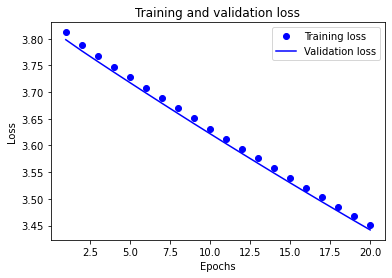

In [16]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

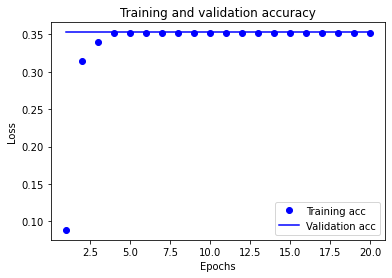

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Retraining a model from scratch

In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
history2= model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results2 = model.evaluate(test_data, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 41ms/step - loss: 3.8120 - accuracy: 0.3331 - val_loss: 3.7979 - val_accuracy: 0.3530
Epoch 2/9
16/16 [==============================] - 0s 26ms/step - loss: 3.7881 - accuracy: 0.3514 - val_loss: 3.7771 - val_accuracy: 0.3530
Epoch 3/9
16/16 [==============================] - 0s 26ms/step - loss: 3.7677 - accuracy: 0.3514 - val_loss: 3.7570 - val_accuracy: 0.3530
Epoch 4/9
16/16 [==============================] - 0s 26ms/step - loss: 3.7477 - accuracy: 0.3514 - val_loss: 3.7373 - val_accuracy: 0.3530
Epoch 5/9
16/16 [==============================] - 0s 27ms/step - loss: 3.7280 - accuracy: 0.3514 - val_loss: 3.7177 - val_accuracy: 0.3530
Epoch 6/9
16/16 [==============================] - 0s 28ms/step - loss: 3.7084 - accuracy: 0.3514 - val_loss: 3.6983 - val_accuracy: 0.3530
Epoch 7/9
16/16 [==============================] - 0s 26ms/step - loss: 3.6890 - accuracy: 0.3514 - val_loss: 3.6790 - val_accuracy: 0.3530
Epoch 8/9
16/16 [===

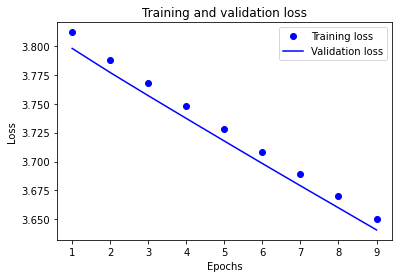

In [19]:
import matplotlib.pyplot as plt
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
epochs2 = range(1, len(loss2) + 1)
plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

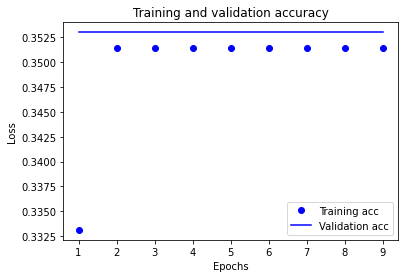

In [20]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
print(results, results2)

[3.4469516277313232, 0.3615316152572632] [3.643095016479492, 0.3615316152572632]


In [22]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
history3= model.fit(partial_x_train, partial_y_train, epochs=25, batch_size=512, validation_data=(x_val, y_val))
results3 = model.evaluate(test_data, one_hot_test_labels)

Epoch 1/25
16/16 [==============================] - 3s 127ms/step - loss: 3.8120 - accuracy: 0.1879 - val_loss: 3.7982 - val_accuracy: 0.2220
Epoch 2/25
16/16 [==============================] - 2s 117ms/step - loss: 3.7882 - accuracy: 0.2164 - val_loss: 3.7772 - val_accuracy: 0.2220
Epoch 3/25
16/16 [==============================] - 2s 118ms/step - loss: 3.7678 - accuracy: 0.2393 - val_loss: 3.7572 - val_accuracy: 0.2220
Epoch 4/25
16/16 [==============================] - 2s 120ms/step - loss: 3.7479 - accuracy: 0.2164 - val_loss: 3.7375 - val_accuracy: 0.2220
Epoch 5/25
16/16 [==============================] - 2s 118ms/step - loss: 3.7282 - accuracy: 0.2164 - val_loss: 3.7179 - val_accuracy: 0.2220
Epoch 6/25
16/16 [==============================] - 2s 123ms/step - loss: 3.7085 - accuracy: 0.2164 - val_loss: 3.6985 - val_accuracy: 0.2220
Epoch 7/25
16/16 [==============================] - 2s 118ms/step - loss: 3.6890 - accuracy: 0.2339 - val_loss: 3.6791 - val_accuracy: 0.2220
Epoch 